In [292]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns; sns.set() 
%matplotlib inline

#### 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [293]:
df = pd.read_csv("cars-dataset.CSV")

In [294]:
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [295]:
df.shape

(398, 8)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [297]:
df.hp = pd.to_numeric(df.hp, errors = 'coerce')
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0


In [298]:
df.isnull().sum()

car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [299]:
df[df.hp.isnull()==True]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


In [300]:
df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.804203
hp,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
wt,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,1.000000


In [301]:
# imputing Missing values in HP with mean values grouped based displacement as displacement is highly correlated to Hp
df["hp"] = df.groupby("disp").transform(lambda x: x.fillna(x.mean()))

In [302]:
carname = df['car name']
df.drop('car name', axis = 1, inplace = True)

In [303]:
df.sample(10)

,cyl,disp,hp,wt,acc,yr,mpg
215,8,318.0,8.0,3755,14.0,76,13.0
218,4,79.0,4.0,1825,18.6,77,36.0
124,8,350.0,8.0,3664,11.0,73,11.0
396,4,120.0,4.0,2625,18.6,82,28.0
317,4,97.0,4.0,2188,15.8,80,34.3
39,8,400.0,8.0,4464,11.5,71,14.0
36,6,250.0,6.0,3302,15.5,71,19.0
32,4,98.0,4.0,2046,19.0,71,25.0
167,4,97.0,4.0,2171,16.0,75,29.0
115,8,350.0,8.0,4082,13.0,73,15.0


In [304]:
df.shape

(398, 7)

In [305]:
df.columns

Index(['cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'mpg'], dtype='object')

In [306]:
# changing all non numeric values in numeric columns to numeric 
df = df[df['cyl'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
df = df[df['disp'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
df = df[df['hp'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
df = df[df['wt'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
df = df[df['acc'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
df = df[df['yr'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
df = df[df['mpg'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
print(df.shape)

(398, 7)


In [307]:
from scipy.stats import zscore

In [308]:
df = df.apply(zscore)
df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,1.498191,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.498191,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.498191,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.498191,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,1.498191,0.565841,-1.840117,-1.627426,-0.834543


2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


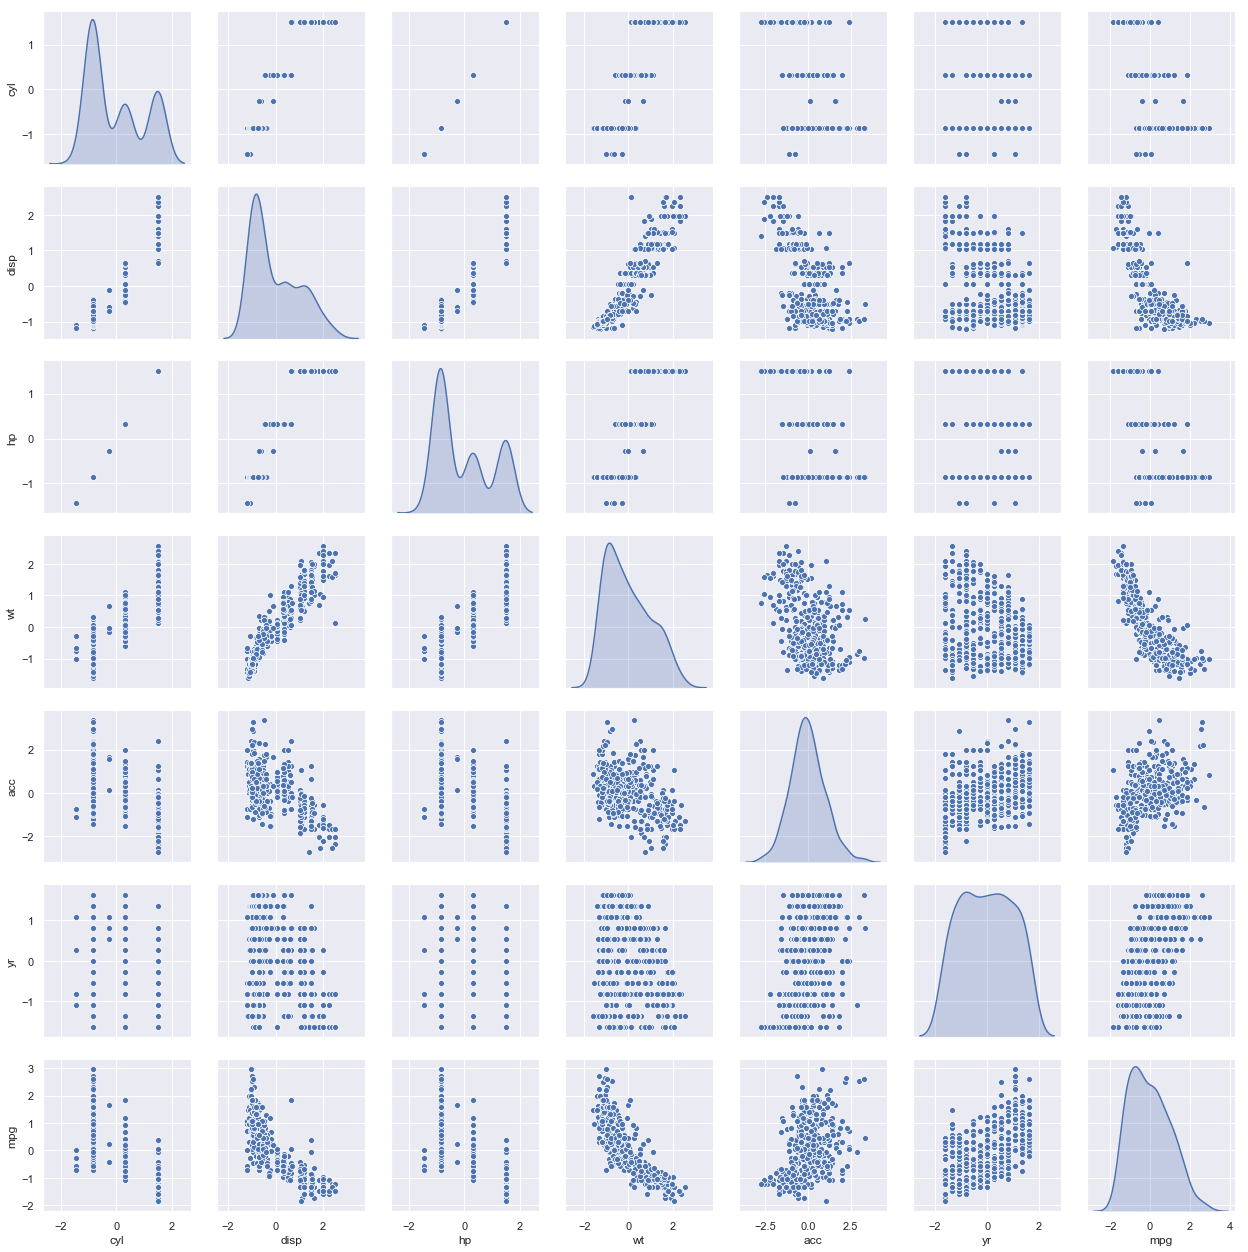

In [309]:
sns.pairplot(df, diag_kind='kde')

Observing the pair plot we can conclude that we may have 3 or 4 distint clusters in the data

3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)


Using KMeans to clusters

In [310]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

In [311]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    distortions = sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1))
    meanDistortions.append( distortions / df.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

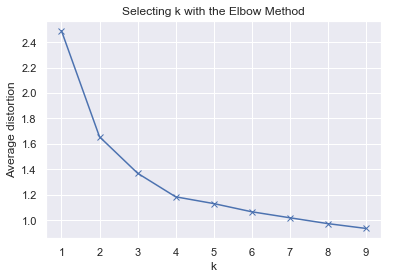

In [312]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Through the elbow method, We can assume that 3 can be an optimal cluster value for the model 

In [313]:
final_model=KMeans(3)
final_model.fit(df)
prediction=final_model.predict(df)

In [314]:
df['Carname'] = carname

In [315]:
#Append the prediction 
df["GROUP"] = prediction
print("Groups Assigned : \n")
df[["Carname", "GROUP"]].sample(10)

Groups Assigned : 



,Carname,GROUP
239,subaru dl,2
30,chevrolet vega 2300,2
358,mazda 626,2
152,plymouth valiant custom,0
385,datsun 310 gx,2
208,plymouth volare premier v8,1
387,oldsmobile cutlass ciera (diesel),0
349,mazda glc 4,2
333,datsun 280-zx,0
360,volvo diesel,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B636115128>,
      dtype=object)

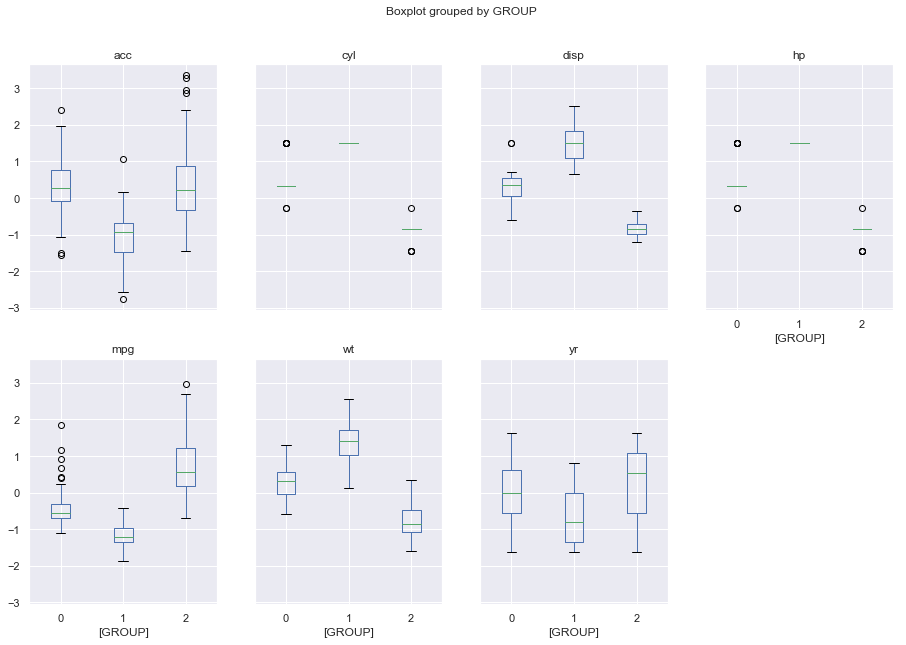

In [316]:
df.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

#### We can observe that most of the features are distinct based on the groups formed

4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

###  As the question is not very clear on what we should be predicting (MPG or Group), based on the discussion with fellow students, assuming MPG as the target column and predicting the same for all the three groups

In [317]:
group1 = df[df['GROUP'] == 0]
group2 = df[df['GROUP'] == 1]
group3 = df[df['GROUP'] == 2]

In [318]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()

In [319]:
group1.drop(['Carname', 'GROUP'], axis = 1, inplace = True)
group2.drop(['Carname', 'GROUP'], axis = 1, inplace = True)
group3.drop(['Carname', 'GROUP'], axis = 1, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [320]:
x = group1.drop('mpg', axis = 1)
y=group1['mpg']
x2 = group2.drop('mpg', axis = 1)
y2=group2['mpg']
x3 = group3.drop('mpg', axis = 1)
y3=group3['mpg']

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=100)
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=100)

In [322]:
lm1.fit(X_train,y_train)
lm2.fit(X2_train,y2_train)
lm3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [323]:
print('Coefficients of Model 1 : \n ', lm1.coef_)
print('Coefficients of Model 2 : \n ', lm2.coef_)
print('Coefficients of Model 3 : \n ', lm3.coef_)

Coefficients of Model 1 : 
  [ 0.05966072  0.28020381  0.05966072 -0.64544018 -0.06857902  0.30934438]
Coefficients of Model 2 : 
  [-1.60653119e+11 -2.55354203e-01 -1.60870933e+11 -9.95068600e-02
 -2.36016834e-01  2.25214250e-01]
Coefficients of Model 3 : 
  [ 0.87936335 -0.7315147   0.87936335 -0.78957436  0.07308683  0.486834  ]
